# Analysis of Video-games sales/Market

-------------------------------------------------------------------------------------------------

## Data Preprocessing

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Loading the dataset
df= pd.read_csv("C:/Users/works/Desktop/Tech stack/projects-20230901T120436Z-001/projects/BA/Video_Games_Sales_as_at_22_Dec_2016.csv")

##### Initial data exploration and cleaning

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [7]:
#Checking for missing values
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [8]:
#handling missing values
df['Year_of_Release'].fillna(df['Year_of_Release'].median(), inplace=True)
df['Genre'].fillna('Unknown', inplace=True)
df['Publisher'].fillna('Unknown', inplace=True)
df['Critic_Score'].fillna(df['Critic_Score'].mean(), inplace=True)
df['Critic_Count'].fillna(df['Critic_Count'].mean(), inplace=True)

# Convert 'User_Score' to numeric and handle non-numeric values
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df.loc[df['User_Score'].isnull(), 'User_Score'] = df['User_Score'].mean()

df['User_Count'].fillna(df['User_Count'].mean(), inplace=True)
df['Developer'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Unknown', inplace=True)

In [9]:
df.dropna(subset=['Name'], inplace=True)

In [10]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

##### Missing values issue has been resolved

------------------------------------------------------------------------------------------------------

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

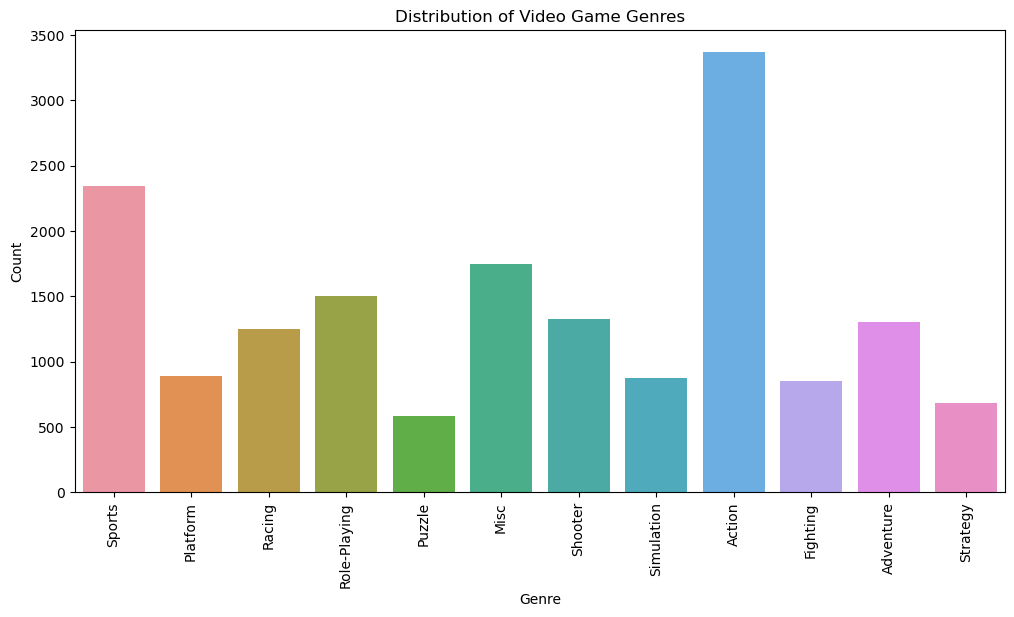

In [12]:
#Distribution of video game genres
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=df)
plt.title('Distribution of Video Game Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

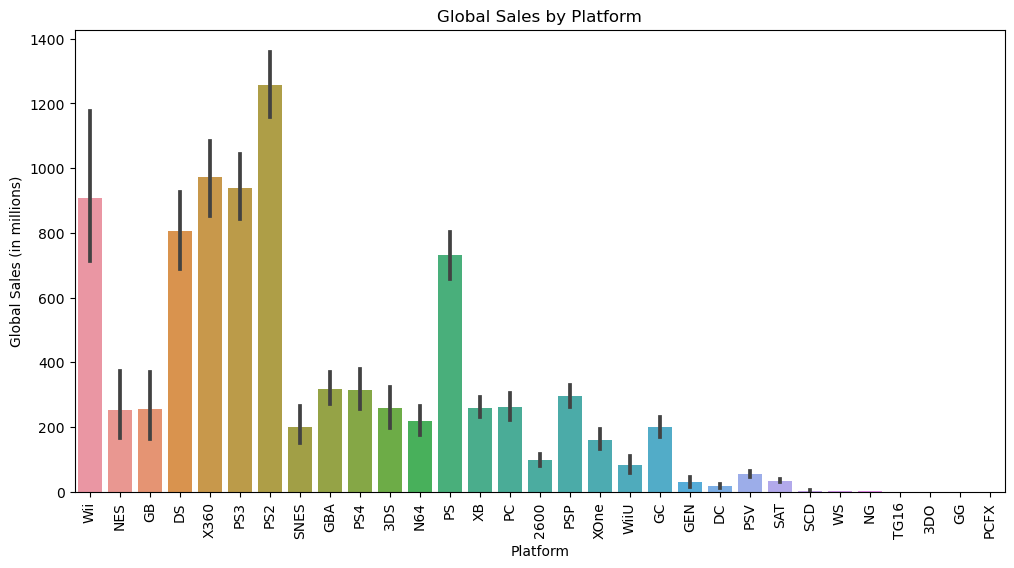

In [13]:
# Global sales by platform
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Global_Sales', data=df, estimator=np.sum)
plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

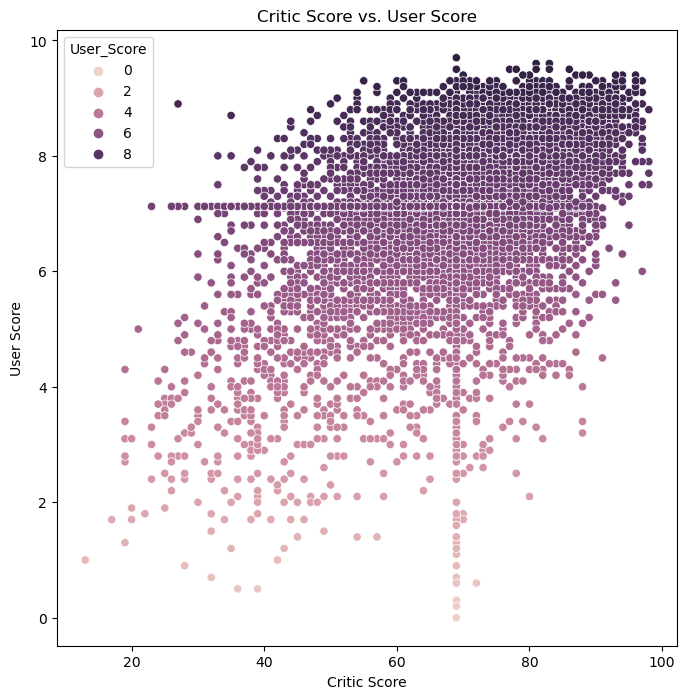

In [14]:
# Scatter plot of Critic Score vs. User Score
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Critic_Score', y='User_Score', data=df, hue='User_Score')
plt.title('Critic Score vs. User Score')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.show()

#### Bar Plot of Sales by Genre:

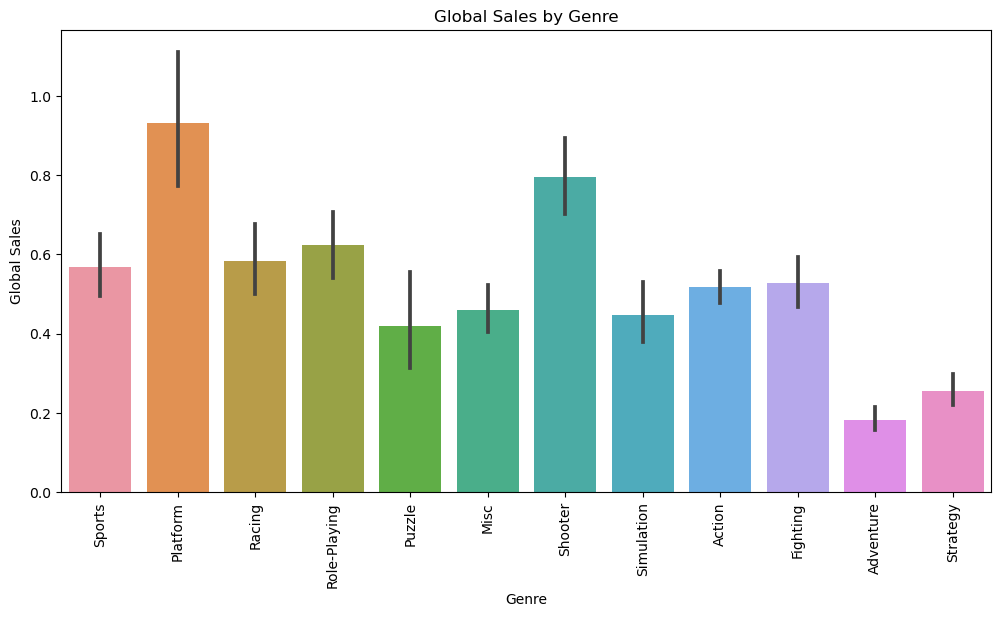

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Global_Sales', data=df)
plt.title('Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.xticks(rotation=90)
plt.show()

##### Box Plot of Sales by Platform:

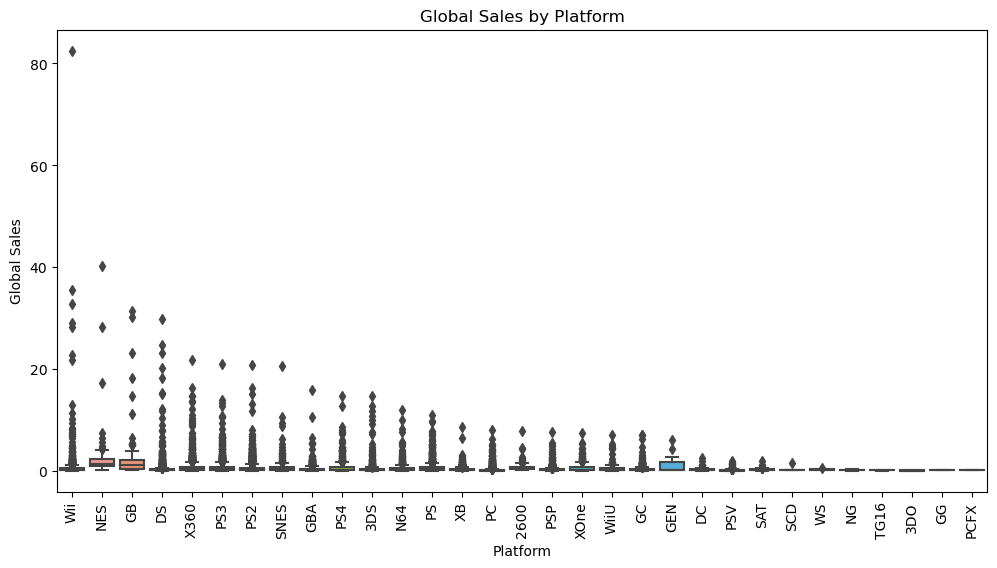

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Platform', y='Global_Sales', data=df)
plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation=90)
plt.show()


### Heatmap for correlation of numeric variables

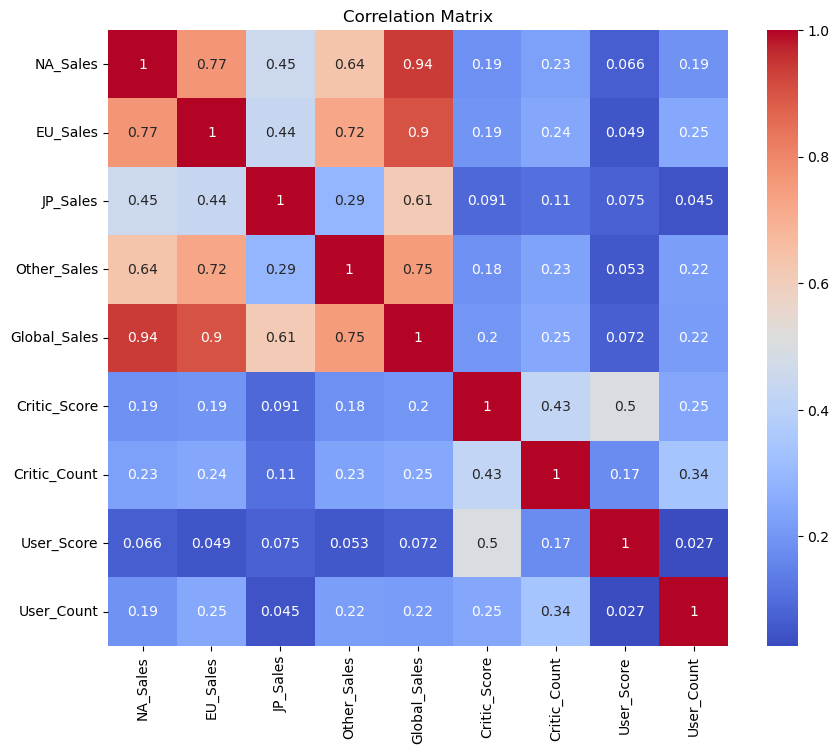

In [17]:
numeric_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
                   'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Count plot of ratings

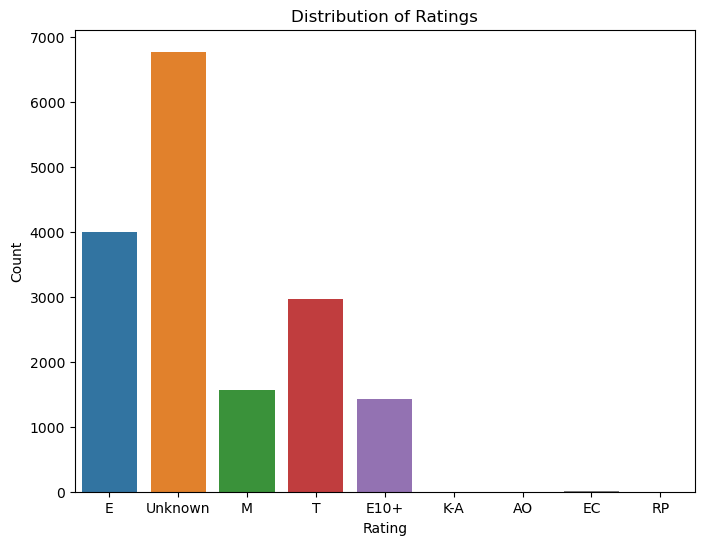

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### Count plot for distribution of release

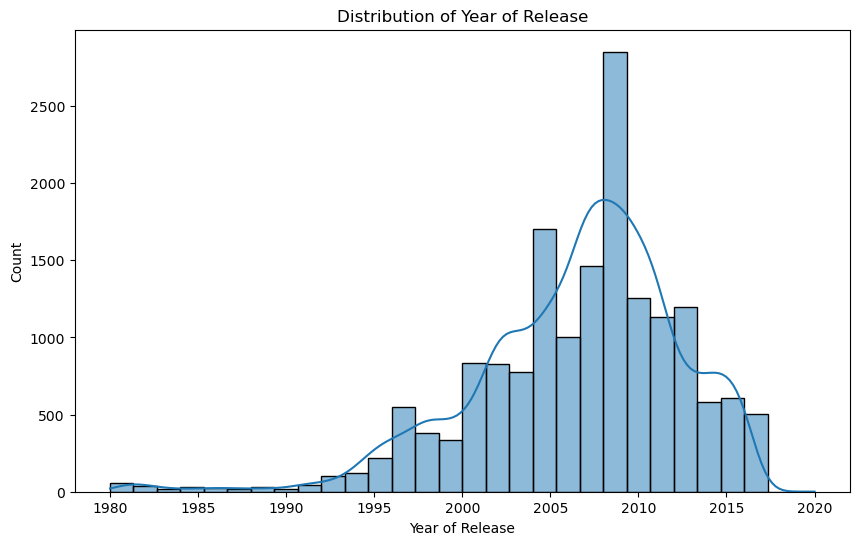

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Year_of_Release', data=df, bins=30, kde=True)
plt.title('Distribution of Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.show()

### Top performing games

In [20]:
# Step 3: Sort the dataset by 'Global_Sales' in descending order
sorted_df = df.sort_values(by='Global_Sales', ascending=False)

# Step 4: Select the top 20 best-selling games
top_20_games = sorted_df.head(20)

In [21]:
top_20_games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,7.125046,162.229908,Unknown,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,7.125046,162.229908,Unknown,Unknown
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,68.967679,26.360821,7.125046,162.229908,Unknown,Unknown
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.000000,65.000000,8.500000,431.000000,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.000000,41.000000,6.600000,129.000000,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.000000,80.000000,8.400000,594.000000,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,68.967679,26.360821,7.125046,162.229908,Unknown,Unknown


#### Top genres

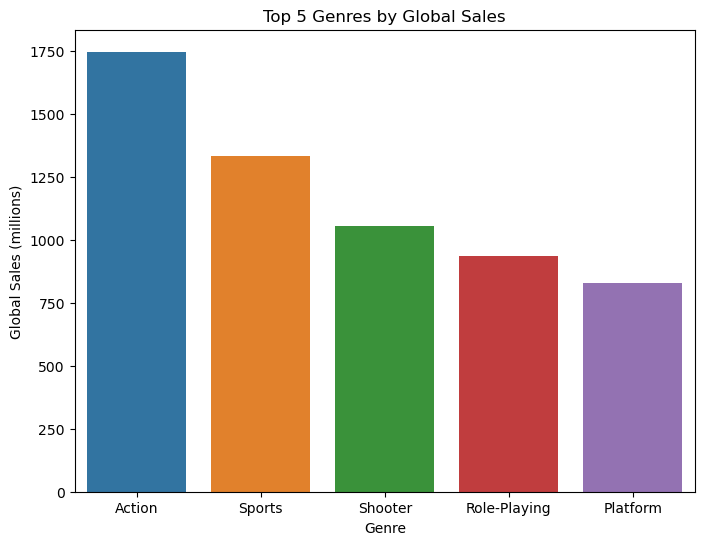

In [22]:
top_genres = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)[:5]

plt.figure(figsize=(8, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 5 Genres by Global Sales')
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')
plt.show()

#### Most preferred platforms

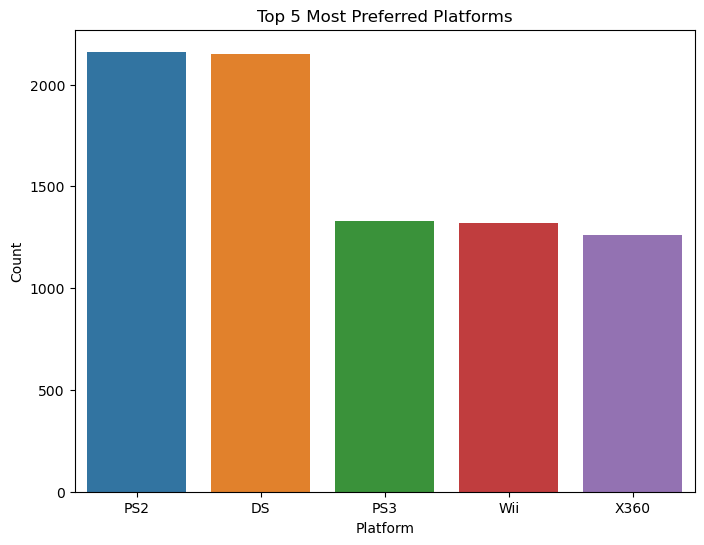

In [23]:
top_platforms = df['Platform'].value_counts().nlargest(5)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_platforms.index, y=top_platforms.values)
plt.title('Top 5 Most Preferred Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

#### Best games as per critic

In [24]:
top_20_games_critic_score = df.nlargest(20, 'Critic_Score')

top_20_games_critic_score[['Name', 'Critic_Score']]

,Name,Critic_Score
51,Grand Theft Auto IV,98.0
57,Grand Theft Auto IV,98.0
227,Tony Hawk's Pro Skater 2,98.0
5350,SoulCalibur,98.0
16,Grand Theft Auto V,97.0
23,Grand Theft Auto V,97.0
38,Grand Theft Auto III,97.0
42,Grand Theft Auto V,97.0
49,Super Mario Galaxy,97.0
97,Super Mario Galaxy 2,97.0


#### Best games as per user 

In [25]:
top_20_games_user_score = df.nlargest(20, 'User_Score')

top_20_games_user_score[['Name', 'User_Score']]

,Name,User_Score
14414,Breath of Fire III,9.7
3417,Harvest Moon: Friends of Mineral Town,9.6
8976,Boktai: The Sun is in Your Hand,9.6
1645,Golden Sun: The Lost Age,9.5
5920,MLB SlugFest Loaded,9.5
10106,Cory in the House,9.5
11120,Super Puzzle Fighter II,9.5
16550,Wade Hixton's Counter Punch,9.5
16631,Karnaaj Rally,9.5
146,Metal Gear Solid,9.4


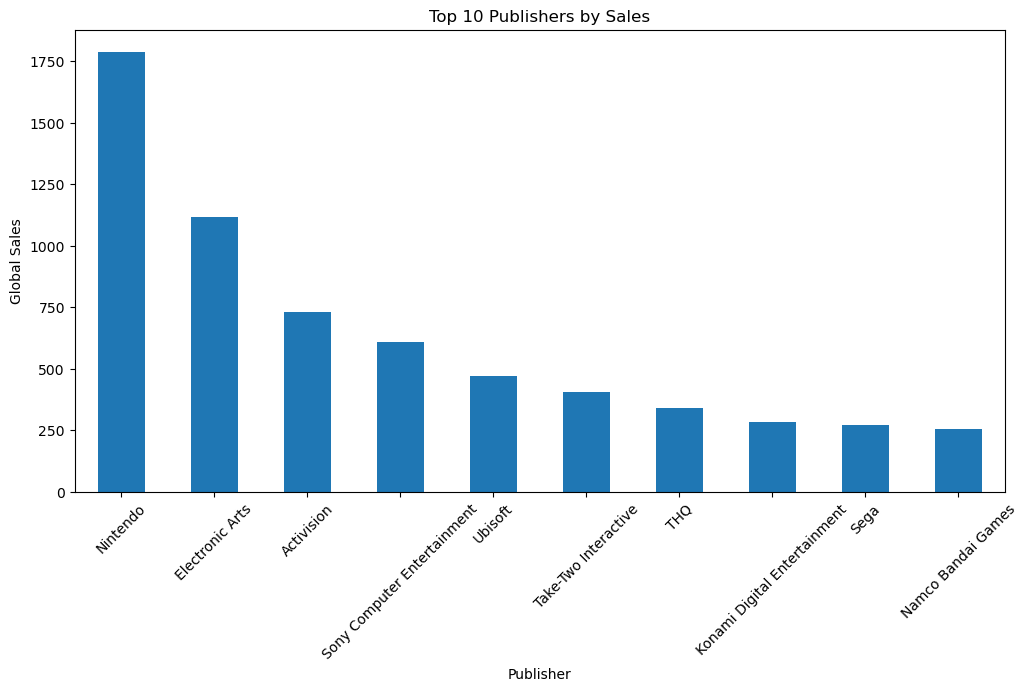

In [26]:
# Calculate the total sales for each publisher
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Select the top N publishers
top_publishers = publisher_sales.head(10)

# Plot the bar graph
plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar')
plt.title('Top 10 Publishers by Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

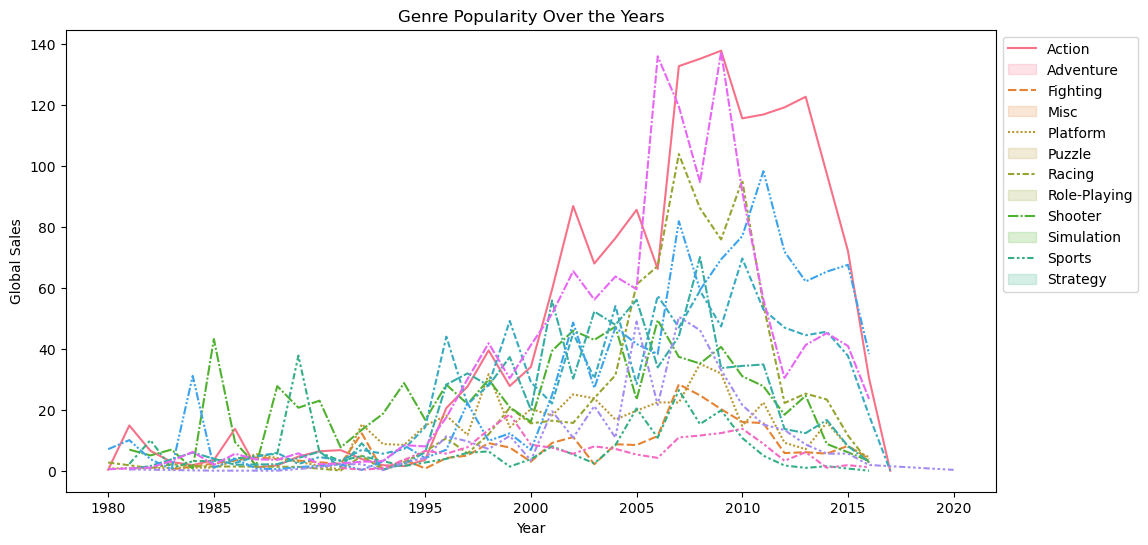

In [27]:
# Group the data by year and genre and calculate the total sales
genre_popularity = df.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().reset_index()

# Pivot the data to have years as columns and genres as rows
genre_popularity_pivot = genre_popularity.pivot(index='Genre', columns='Year_of_Release', values='Global_Sales')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_popularity_pivot.T)
plt.title('Genre Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend(genre_popularity_pivot.index, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()







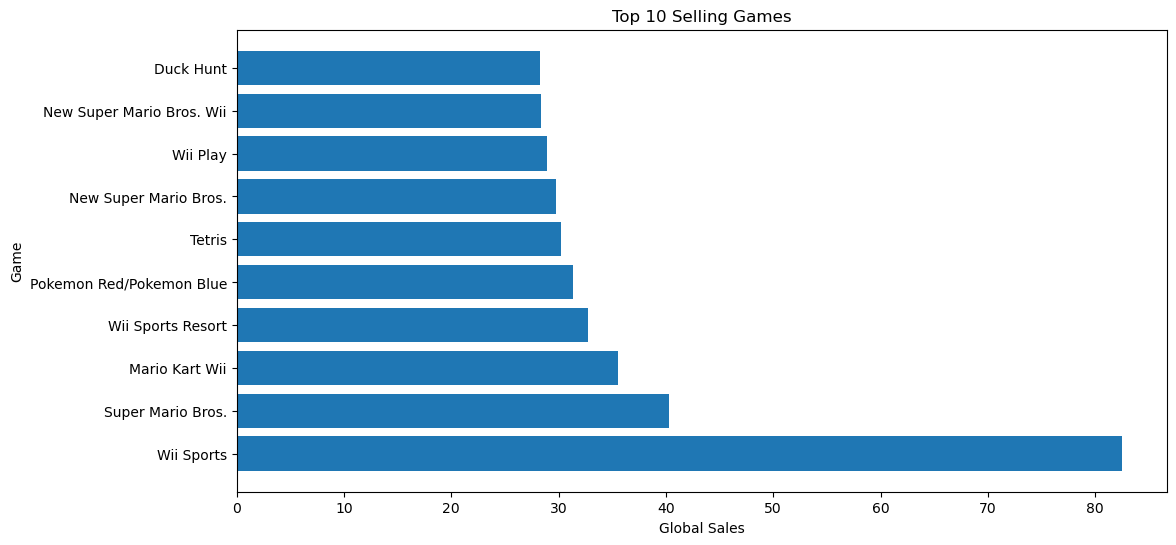

In [28]:
# Sort the data by global sales in descending order
top_selling_games = df.sort_values(by='Global_Sales', ascending=False).head(10)

# Create the horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_selling_games['Name'], top_selling_games['Global_Sales'])
plt.title('Top 10 Selling Games')
plt.xlabel('Global Sales')
plt.ylabel('Game')
plt.show()

In [29]:
top_20_games_user_score = df.nlargest(20, 'User_Score')

top_20_games_user_score[['Name', 'Publisher', 'User_Score']]

,Name,Publisher,User_Score
14414,Breath of Fire III,Capcom,9.7
3417,Harvest Moon: Friends of Mineral Town,Ubisoft,9.6
8976,Boktai: The Sun is in Your Hand,Konami Digital Entertainment,9.6
1645,Golden Sun: The Lost Age,Nintendo,9.5
5920,MLB SlugFest Loaded,Midway Games,9.5
10106,Cory in the House,Disney Interactive Studios,9.5
11120,Super Puzzle Fighter II,Capcom,9.5
16550,Wade Hixton's Counter Punch,"Destination Software, Inc",9.5
16631,Karnaaj Rally,Jaleco,9.5
146,Metal Gear Solid,Konami Digital Entertainment,9.4


In [30]:
top_20_games_user_score = df.nlargest(20, 'User_Score')

top_20_games_user_score[['Name', 'Publisher', 'Genre', 'User_Score']]


,Name,Publisher,Genre,User_Score
14414,Breath of Fire III,Capcom,Role-Playing,9.7
3417,Harvest Moon: Friends of Mineral Town,Ubisoft,Simulation,9.6
8976,Boktai: The Sun is in Your Hand,Konami Digital Entertainment,Role-Playing,9.6
1645,Golden Sun: The Lost Age,Nintendo,Role-Playing,9.5
5920,MLB SlugFest Loaded,Midway Games,Sports,9.5
10106,Cory in the House,Disney Interactive Studios,Action,9.5
11120,Super Puzzle Fighter II,Capcom,Puzzle,9.5
16550,Wade Hixton's Counter Punch,"Destination Software, Inc",Sports,9.5
16631,Karnaaj Rally,Jaleco,Racing,9.5
146,Metal Gear Solid,Konami Digital Entertainment,Action,9.4
